In [1]:
import math

## I. Exhaustive Search, Dichotomy and Golden Section

In [5]:
def frange(start, stop, step):
    # Range for float numbers
    while start < stop:
        yield start
        start += step

In [65]:
def func1(x):
    func1.counter +=1
    return pow(x, 3)

def func2(x):
    func2.counter +=1
    return abs(x-0.2)

def func3(x):
    func3.counter +=1
    if 0.01 <= x <= 1:
        return x*math.sin(1/x)
    else:
        print("x is not in range [0.1; 1]")
        return 0


In [67]:
# Exhaustive Search

a = 0.01
b = 1
eps = 0.001

fmin = 0
xmin = 0
iterations = 0
func3.counter = 0
for x in frange(a, b+eps, eps):
    current_f = func3(x)
    iterations +=1
    if x == a:
        fmin = current_f
        xmin = x
    if current_f < fmin:
        fmin = current_f
        xmin = x
print(func3.counter)
print(iterations)
print("Minimum f(x) =", fmin)
print("Minimum x =", xmin)

x is not in range [0.1; 1]
991
991
Minimum f(x) = -0.2172246125808345
Minimum x = 0.22300000000000017


In [68]:
# Dichotomy (bisection method)
def dichotomy(f, a, b, eps, c=1):
    # c = 1, (min F(x))
    # c = -1, (max F(x))
    iterations = 0
    while True:
        iterations += 1
        x = (a + b) / 2
        f1 = f(x - eps)
        f2 = f(x + eps)
        
        if (c * f1) < (c * f2):
            b = x
        else:
            a = x
        if (b - a) < eps:
            break
    x = (b + a) / 2
    fmin = f(x)
    print("x=", x)
    print("fmin=", fmin)
    print("iterations =", iterations)
    return


a = 0
b = 1
eps = 0.001
iterations = 0
dichotomy(func3, 0.01, b, eps)

x= 0.22221191406250002
fmin= -0.2172286118926715
iterations = 10


In [57]:
# Golden Section
def goldenSection(f, a, b, eps, phi=(3-math.sqrt(5))/2, psi=(math.sqrt(5)-1)/2):
    iterations = 0
    x1 = a + phi*(b - a)
    x2 = a + psi*(b - a)
    fx1 = f(x1)
    fx2 = f(x2)

    while(abs(a-b) > eps and abs(a-b) > eps*abs(a+b)/2):
        iterations +=1
        if fx1 < fx2:
            b = x2
            x2 = x1
            fx2 = fx1
            x1 = a + psi*(x2 - a)
            fx1 = f(x1)
        else:
            a = x1
            x1 = x2
            fx1 = fx2
            x2 = b - psi*(b - x1)
            fx2 = f(x2)

    print("iterations =", iterations)
    return (x1 + x2) / 2


a = 0
b = 1
eps = 0.001 
goldenSection(func2, 0, b, eps)

iterations = 15


0.20007331374358572

## II. Multidimensional Methods of exhaustive search, Gauss (coordinate descent), Nelder-Mead) in the tasks of unconstrained nonlinear optimization

In [8]:
import random
import numpy as np
import scipy
from cProfile import label
from cmath import log
import matplotlib.pyplot as plt

In [9]:
alfa, beta = random.random(), random.random()
x, y = [], []

for k in range(100+1):
    x_k = k/100
    y_k = alfa*x_k + beta + np.random.normal(0, 1)
    x.append(x_k)
    y.append(y_k)

print("x[:10]:", x[:10])
print("y[:10]:", y[:10])



x[:10]: [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
y[:10]: [0.6884867583295398, 2.4277443177032225, 1.479530345161025, 2.0719040999590996, 0.3469377562150704, 0.6065803418079245, 0.5112883961463841, 1.015162955934299, -0.6591112007574472, 1.037767730602695]


In [15]:
def mean_squared_error(y_true, y_predicted):
    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost

# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001,
                     stopping_threshold = 1e-6):
     
    # Initializing weight, bias, learning rate and iterations
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
     
    costs = []
    weights = []
    previous_cost = None
     
    # Estimation of optimal parameters
    for i in range(iterations):
         
        # Making predictions
        y_predicted = (current_weight * np.asarray(x)) + current_bias
         
        # Calculationg the current cost
        current_cost = mean_squared_error(y, y_predicted)
 
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(current_weight)
         
        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
         
        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
                 
        # Printing the parameters for each 1000th iteration
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        {current_weight}, Bias {current_bias}")
     
     
    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
     
    return current_weight, current_bias

Iteration 1: Cost 1.644763227932717, Weight         0.10010157750979184, Bias 0.010193028043549112
Iteration 2: Cost 1.644287510095458, Weight         0.10020312891108618, Bias 0.010386007323738535
Iteration 3: Cost 1.6438120334916544, Weight         0.1003046542105086, Bias 0.010578937852931791
Iteration 4: Cost 1.643336797998972, Weight         0.10040615341468305, Bias 0.010771819643489266
Iteration 5: Cost 1.6428618034951377, Weight         0.10050762653023176, Bias 0.01096465270776821
Iteration 6: Cost 1.6423870498579418, Weight         0.10060907356377531, Bias 0.011157437058122745
Iteration 7: Cost 1.641912536965237, Weight         0.10071049452193258, Bias 0.011350172706903855
Iteration 8: Cost 1.6414382646949357, Weight         0.10081188941132077, Bias 0.011542859666459394
Iteration 9: Cost 1.6409642329250145, Weight         0.10091325823855542, Bias 0.011735497949134081
Iteration 10: Cost 1.6404904415335106, Weight         0.10101460101025037, Bias 0.011928087567269511
Itera

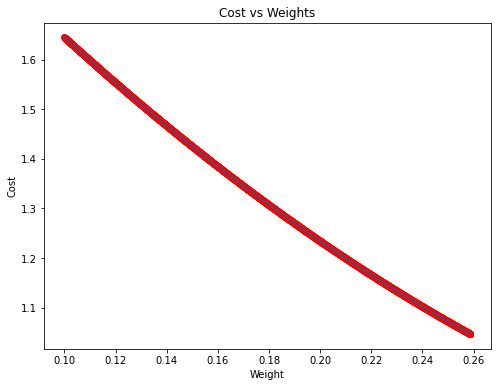

Estimated Weight: 0.2587723805881548
Estimated Bias: 0.3131485789153772


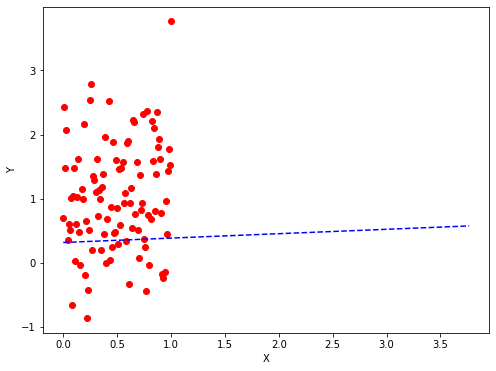

In [17]:
estimated_weight, eatimated_bias = gradient_descent(x, y, iterations=2000)
print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {eatimated_bias}")

# Making predictions using estimated parameters
Y_pred = estimated_weight*np.asarray(x) + eatimated_bias

# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(x, y, marker='o', color='red')
plt.plot([min(x), max(y)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
            markersize=10,linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

[a,b, f-calculations, N of iterations] = [0.0, 0.101, 5005, 6]


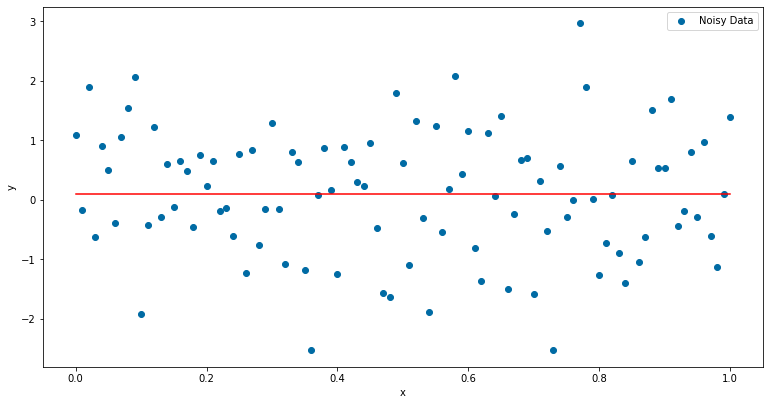

In [7]:
# Visualize

plt.style.use('tableau-colorblind10')

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([1, 1, 1, 1])
ax.set_ylabel('y')
ax.set_xlabel('x')

ax1 = ax.scatter(x, y, label="Noisy Data")
# ax2 = ax.plot(x_approx, y_approx, label="Linear approximant")
ax.legend(loc='upper right')

plt.show()